In [1]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

Mini to do list
* create two csv files, one for male the other for female
* check for bad values
* modify event distance to be only a number with a separate column to identify the race format
* Create a start date and end date column, since there are ultras that start on one day and end on another
* Convert athlete birth to int
* get rid of the m and w in athlete age category

Column completion checklist:
* year of event
* event dates
* event_name

In [2]:
df = pd.read_csv('../data/ultra_marathons.csv')
df.sample(5)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_19432\4278176657.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ultra_marathons.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2455309,2019,29.09.2019,Muraoka 66 km Ultra Marathon (JPN),66km,233,10:54:29 h,"*Kobe, Hyogo Pref.",JPN,1962.00,M,M55,6.051,114202
3581718,2022,05.11.2022,Stone Cat 50 km Trail Race (USA),50km,157,4:45:33 h,"*Medford, MA",USA,1976.00,M,M45,10.506,129061
7419127,1995,25.11.1995,Quad Dipsea Trail Run (USA),28mi,183,5:23:37 h,NaN,USA,1979.00,M,MU23,8355.00,1635328
6927006,1980,06.-07.06.1980,100 km Lauf Biel (SUI),100km,2866,8:16:00 h,*Waldenbuch,GER,1953.00,M,M23,12097.00,24934
2435965,2019,08.-10.10.2019,100 km del Sahara (TUN),100km/3Etappen,34,13:20:26 h,NaN,ITA,1981.00,M,M35,7.496,183693


In [3]:
df['Athlete year of birth'] = df['Athlete year of birth'][df['Athlete year of birth'].notnull()].astype(int)
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.00,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.00,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.00,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.00,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.00,M,M23,8.469,4


In [4]:
df.isnull().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [5]:
df['Athlete gender'].value_counts()

Athlete gender
M    6035358
F    1425784
X         46
Name: count, dtype: int64

In [6]:
x_gender = df[df['Athlete gender'] == 'X']['Athlete ID'].unique()

In [7]:
df[df['Athlete ID'].isin(list(x_gender))].sort_values(by = 'Athlete gender').head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
7347395,1993,31.07.-01.08.1993,Vermont 100 Mile Endurance Race (USA),100mi,164,21:19:33 h,NaN,USA,1963.00,M,M23,7546.00,420655
2075210,2019,04.05.2019,Wilsons Promontory 60 km Trail Race (AUS),60km,84,8:26:01 h,NaN,AUS,NaN,M,NaN,7.114,420655
1636639,2017,28.-29.07.2017,Lakeland 50 Mile (GBR),50mi,662,7:51:42 h,Team Montane,GBR,1992.00,M,M23,10.235,609724
5423236,2012,11.-12.08.2012,North Downs Way 100 Mile Race (GBR),100mi,69,29:34:00 h,NaN,GBR,1976.00,M,M35,5.44,609724
5450501,2012,30.06.-01.07.2012,Round The Island Isle of Wight Multistage Ultr...,70mi/2Etappen,94,14:53:11 h,NaN,GBR,1976.00,M,M35,7.568,609724


In [8]:
df['Athlete gender'][df['Athlete ID'].isin([420655, 609724])] = 'M'
df[df['Athlete gender'] == 'X'].head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_19432\352007257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Athlete gender'][df['Athlete ID'].isin([420655, 609724])] = 'M'


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
73627,2018,21.01.2018,Zhenxibao (Cinsbu) 54 km Ultramarathon (TPE),54km,926,8:48:43 h,NaN,TPE,1988.00,X,NaN,6.13,63250
151581,2018,08.04.2018,Cape Cod 50K Trail Race (USA),50km,50,6:26:26 h,"*Plymouth, MA",USA,1999.00,X,NaN,7.763,120517
291422,2018,19.05.2018,Silver State 50 Mile (USA),50mi,79,12:22:41 h,"*San Francisco, CA",USA,1975.00,X,NaN,6.50,201998
596645,2018,08.12.2018,Hunter S. Thompson Fear & Loathing 50 Km (USA),50km,47,5:48:00 h,"*San Francisco, CA",USA,1975.00,X,NaN,8.621,201998
617444,2018,24.11.2018,Quad Dipsea Trail Run (USA),28mi,279,5:51:40 h,"*San Francisco, CA",USA,1975.00,X,NaN,7.688,201998


In [9]:
new_columns = {
    'Year of event': 'year_of_event',
    'Event dates': 'event_dates',
    'Event name': 'event_name',
    'Event distance/length': 'distance_or_length',
    'Event number of finishers': 'no_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete club': 'athlete_club',
    'Athlete country': 'athlete_country',
    'Athlete year of birth': 'birth_year',
    'Athlete gender': 'gender',
    'Athlete age category': 'age_category',
    'Athlete average speed': 'average_speed',
    'Athlete ID': 'athlete_id'
}
df.rename(columns = new_columns, inplace = True)
df.head()

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.00,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.00,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.00,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.00,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.00,M,M23,8.469,4


In [10]:
df['age_category'].value_counts().sort_index()

age_category
F35           1
M20       18836
M23     1228209
M30       23493
M35      989217
M40     1054195
M45      908337
M50      626637
M55      351116
M60      168131
M65       66603
M70       21698
M75        5502
M80        1225
M85         164
M90          19
M95          28
MU20       1355
MU23     100183
W20        2890
W23      314473
W30        4385
W35      245020
W40      264967
W45      221291
W50      135437
W55       64656
W60       25664
W65        8810
W70        2850
W75         873
W80         123
W85           8
W90           2
W95           3
WU20        316
WU23      19540
Name: count, dtype: int64

In [13]:
df.loc[df['age_category'] == 'F35', 'age_category'] = 'W35'

In [14]:
old_age_cat_mask = (df['age_category'].isnull()) & (df['age_category'].isin(['MU23', 'MU20', 'WU20', 'WU23']))

def change_age_cats(row):
    gender = 'W' if row['gender'] == 'F' else 'M'
    try:
        birth_year = int(row['birth_year'])
        int('year_of_event')
    except:
        return gender + '0'
    age = int(row['year_of_event']) - birth_year
    age_group = int(age) if age % 23 == 0 else int(age / 5) * 5
    return gender + str(abs(age_group))


df.loc[old_age_cat_mask, 'age_category'] = df[old_age_cat_mask].apply(change_age_cats, axis=1)

In [15]:
df['age_category'].value_counts().sort_index()

age_category
M20       18836
M23     1228209
M30       23493
M35      989217
M40     1054195
M45      908337
M50      626637
M55      351116
M60      168131
M65       66603
M70       21698
M75        5502
M80        1225
M85         164
M90          19
M95          28
MU20       1355
MU23     100183
W20        2890
W23      314473
W30        4385
W35      245021
W40      264967
W45      221291
W50      135437
W55       64656
W60       25664
W65        8810
W70        2850
W75         873
W80         123
W85           8
W90           2
W95           3
WU20        316
WU23      19540
Name: count, dtype: int64

c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth_year', ylabel='Count'>

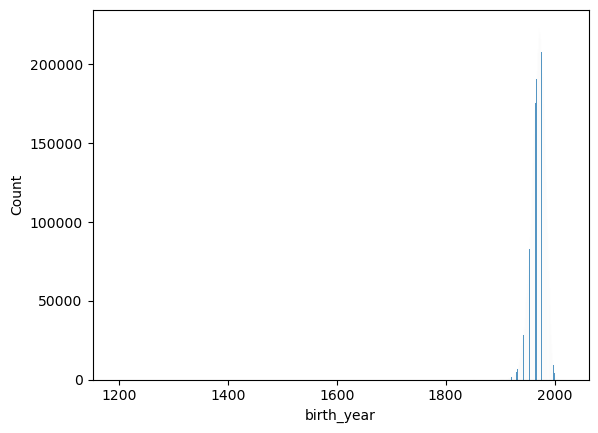

In [16]:
sns.histplot(data = df, x = 'birth_year')

In [17]:
df['birth_year'].describe()

count   6873034.00
mean       1969.76
std          13.13
min        1193.00
25%        1962.00
50%        1971.00
75%        1979.00
max        2021.00
Name: birth_year, dtype: float64

In [18]:
df[df['birth_year'] < (2023 - 90)].sort_values(by = 'birth_year', ascending = True)

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id
2582496,2020,19.06.2020,Dalat Ultra Trail - 45km (VIE),45km,224,8:49:50 h,Adidasrunnerssaigon,VIE,1193.00,M,NaN,5.096,819254
6824337,1807,12.-13.10.1807,24 h Newmarket (GBR),24h,2,64.374 km,*Lancashire,GBR,1786.00,M,MU23,2682.00,1520516
6824339,1837,30.01.1837,London to Brighton Race (GBR),85km,1,8:37:00 h,NaN,GBR,1791.00,M,M45,9865.00,340384
6824825,1892,02.-03.09.1892,100 km Geneve-Preverenges-Geneve (SUI),100km,10,22:00:00 h,*Anières,SUI,1816.00,M,M75,4545.00,1520678
6825034,1892,05.-15.06.1892,Paris-Belfort (FRA),496km,29,9d 05:57:00 h,*Douai Le Doyen,FRA,1817.00,M,M70,2235.00,1520872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985148,1982,18.04.1982,American River 50 Mile Endurance Run (USA),50mi,324,9:37:09 h,NaN,USA,1932.00,M,M45,8365.00,1571286
6985195,1982,18.04.1982,American River 50 Mile Endurance Run (USA),50mi,324,10:06:25 h,NaN,USA,1932.00,M,M45,7962.00,1564063
6985220,1982,18.04.1982,American River 50 Mile Endurance Run (USA),50mi,324,10:24:41 h,NaN,USA,1932.00,M,M45,7729.00,1574678
6984764,1982,24.04.1982,"100 km du Périgord Noir, Belves (FRA)",100km,393,15:31:00 h,*Volvic,FRA,1932.00,M,M45,6445.00,1570738


In [19]:
df['birth_year'][df['birth_year'] < 1700] = np.nan

C:\Users\OMEN\AppData\Local\Temp\ipykernel_19432\2201173365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'][df['birth_year'] < 1700] = np.nan


In [20]:
df['year_of_event'].describe()

count   7461195.00
mean       2011.98
std          10.01
min        1798.00
25%        2010.00
50%        2015.00
75%        2018.00
max        2022.00
Name: year_of_event, dtype: float64

In [21]:
df['athlete_club'].fillna('Unknown', inplace = True)
df['athlete_club'].isnull().sum()

0

In [22]:
df['distance_or_length'].value_counts()

distance_or_length
50km              1522609
100km              951742
50mi               352181
56km               333253
87km               212062
                   ...   
61.15km                 1
27:30h                  1
178km/2Etappen          1
740km                   1
158.5mi                 1
Name: count, Length: 2159, dtype: int64

In [23]:
df.dtypes

year_of_event            int64
event_dates             object
event_name              object
distance_or_length      object
no_of_finishers          int64
athlete_performance     object
athlete_club            object
athlete_country         object
birth_year             float64
gender                  object
age_category            object
average_speed           object
athlete_id               int64
dtype: object

In [24]:
def can_convert_to_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

df['can_convert'] = df['average_speed'].apply(can_convert_to_float)

# DataFrame with convertible values
convertible_df = df[df['can_convert']]

# DataFrame with non-convertible values
non_convertible_df = df[~df['can_convert']]

print("Convertible to Float:")
print(convertible_df['average_speed'].value_counts())

print("\nNot Convertible to Float:")
print(non_convertible_df['average_speed'].value_counts())
df.drop('can_convert', axis = 1, inplace = True)


Convertible to Float:
average_speed
7         3210
8         3098
4.167     2864
0         2857
10        2421
          ... 
15.654       1
15.547       1
15.426       1
29.185       1
4128.0       1
Name: count, Length: 45918, dtype: int64

Not Convertible to Float:
average_speed
07:00:00    977
12:00:00    790
08:00:00    774
10:00:00    742
00:00:00    691
           ... 
08:31:30      1
08:28:02      1
07:54:04      1
07:47:04      1
09:48:55      1
Name: count, Length: 1326, dtype: int64


In [25]:
pattern = r'(\d+)([a-zA-Z]+)'

df[['distance_or_length', 'race_metric']] = df['distance_or_length'].str.extract(pattern)

df['distance_or_length'] = pd.to_numeric(df['distance_or_length'], errors='coerce')
df.head()

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric
0,2018,06.01.2018,Selva Costera (CHI),50.00,22,4:51:39 h,Tnfrc,CHI,1978.00,M,M35,10.286,0,km
1,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:15:45 h,Roberto Echeverría,CHI,1981.00,M,M35,9.501,1,km
2,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:16:44 h,Puro Trail Osorno,CHI,1987.00,M,M23,9.472,2,km
3,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:34:13 h,Columbia,ARG,1976.00,M,M40,8.976,3,km
4,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:54:14 h,Baguales Trail,CHI,1992.00,M,M23,8.469,4,km


In [26]:
df['race_metric'].value_counts()

race_metric
km         6154371
mi          775930
h           514457
d            12190
Km            1931
Miles          264
miles          234
k              159
Mile            64
mile            58
K               52
m               40
Etappen          5
x                4
Name: count, dtype: int64

In [27]:
df[df['race_metric'] == 'x']

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric
2103612,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,38:31:27 h,"*New Hartford, CT",USA,1977.00,M,M40,0,101669,x
2103613,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,47:11:01 h,"*New Hartford, NY",USA,1996.00,F,WU23,0,129191,x
2103614,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 12:44:40 h,"*Rochester, NY",USA,1964.00,M,M50,0,78349,x
2103615,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 20:49:30 h,"*Worcester, MA",USA,1991.00,M,M23,0,181853,x


In [28]:
metric_conversion = {
    'miles': 'mi',
    'Miles': 'mi',
    'mile': 'mi',
    'Mile': 'mi',
    'm': 'mi',
    'k': 'km',
    'K': 'km',
    'Km': 'km',
    'Etappen': 'stage',
    'h': 'hours',
    'd': 'days',
    'x': '4x52km'
}

df['race_metric'] = df['race_metric'].replace(metric_conversion)
df['race_metric'].value_counts()

race_metric
km        6156513
mi         776590
hours      514457
days        12190
stage           5
4x52km          4
Name: count, dtype: int64

In [29]:
df[df['race_metric'].isin(['4x52km', 'stage'])]

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric
920115,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,35:46:00 h,LSG Karlsruhe,GER,1978.00,M,M35,0.0,58893,stage
920116,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,35:50:00 h,TV Kempten,GER,1961.00,M,M55,0.0,24885,stage
920117,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,36:08:01 h,TV Kempten,GER,1963.00,M,M50,0.0,668,stage
920118,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,36:15:00 h,LSG Karlsruhe,GER,1966.00,M,M50,0.0,201902,stage
920119,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,37:50:00 h,TV Kempten,GER,1986.00,M,M30,0.0,149352,stage
2103612,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,38:31:27 h,"*New Hartford, CT",USA,1977.00,M,M40,0,101669,4x52km
2103613,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,47:11:01 h,"*New Hartford, NY",USA,1996.00,F,WU23,0,129191,4x52km
2103614,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 12:44:40 h,"*Rochester, NY",USA,1964.00,M,M50,0,78349,4x52km
2103615,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 20:49:30 h,"*Worcester, MA",USA,1991.00,M,M23,0,181853,4x52km


In [30]:
df = df[~df['race_metric'].isin(['4x52km', 'stage'])]
df[df['race_metric'].isin(['4x52km', 'stage'])]

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric


In [31]:
df['birth_year'] = df['birth_year'].fillna(0).astype(int)

In [32]:
df['athlete_country'].value_counts()

athlete_country
USA    1389956
FRA    1170884
RSA     877630
JPN     603132
GER     442051
        ...   
AHO          1
SLE          1
BAR          1
TGA          1
ACT          1
Name: count, Length: 208, dtype: int64

In [33]:
df[(df['athlete_country'].str.len() > 3)  | (df['athlete_country'].str.len() < 3)]

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric


In [34]:
df.head()

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric
0,2018,06.01.2018,Selva Costera (CHI),50.00,22,4:51:39 h,Tnfrc,CHI,1978,M,M35,10.286,0,km
1,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:15:45 h,Roberto Echeverría,CHI,1981,M,M35,9.501,1,km
2,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:16:44 h,Puro Trail Osorno,CHI,1987,M,M23,9.472,2,km
3,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:34:13 h,Columbia,ARG,1976,M,M40,8.976,3,km
4,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:54:14 h,Baguales Trail,CHI,1992,M,M23,8.469,4,km


In [35]:
df['event_dates'] = df['event_dates'].str.replace('00', '01')
mask1 = df['event_dates'].str.len() == 10
single_dates = pd.to_datetime(df.loc[mask1, 'event_dates'], format = '%d.%m.%Y')
df.loc[mask1, 'start_date'] = df.loc[mask1, 'end_date'] = single_dates

In [36]:
mask2 = df['event_dates'].str.len() == 14
date_ranges1 = df.loc[mask2, 'event_dates'].str.split('-', expand = True)
end = pd.to_datetime(date_ranges1[1], format='%d.%m.%Y', errors = 'coerce')
start = pd.to_datetime(date_ranges1[0] + date_ranges1[1].str.slice(start = 3), format = '%d.%m.%Y')
df.loc[mask2, 'start_date'] = start
df.loc[mask2, 'end_date'] = end

In [37]:
mask3 = df['event_dates'].str.len() == 17
date_ranges2 = df.loc[mask3, 'event_dates'].str.split('-', expand = True)
end = pd.to_datetime(date_ranges2[1], format='%d.%m.%Y', errors = 'coerce')
start = pd.to_datetime(date_ranges2[0] + date_ranges2[1].str.slice(start = 6), format = '%d.%m.%Y')
df.loc[mask3, 'start_date'] = start
df.loc[mask3, 'end_date'] = end

In [38]:
mask4 = df['event_dates'].str.len() == 21
date_ranges3 = df.loc[mask4, 'event_dates'].str.split('-', expand = True)
start = pd.to_datetime(date_ranges3[0], format = '%d.%m.%Y')
end = pd.to_datetime(date_ranges3[1], format='%d.%m.%Y', errors = 'coerce')
df.loc[mask4, 'start_date'] = start
df.loc[mask4, 'end_date'] = end

In [39]:
df.sample(5)

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date
2465455,2019,22.12.2019,Run Guizhou League Finals - Luodian 50 km (CHN),50.00,219,8:53:37 h,Unknown,CHN,1991,M,M23,5.622,793068,km,2019-12-22,2019-12-22
4730027,2009,28.03.2019,Lake Sonoma 50 Mile Race (USA),50.00,112,11:35:52 h,"*Folsom, CA",USA,1960,M,M45,6.938,710939,mi,2019-03-28,2019-03-28
2249858,2019,27.07.2019,Burning River 50 Mile Endurance Run (USA),50.00,165,14:44:17 h,"*Plymouth, OH",USA,1973,M,M45,5.46,744646,mi,2019-07-27,2019-07-27
6782004,2015,31.10.-01.11.2015,Hasetsune Cup - Japan Mountain Endurance Race ...,5.00,2045,19:13:06 h,オンヨネ,JPN,0,M,NaN,3.72,1516183,km,2015-10-31,2015-11-01
3046347,2021,01.-03.10.2021,Ultra Trail des Montagnes du Jura - L'UTMJ (FRA),187.00,78,45:52:06 h,Biziat Endurance,FRA,1972,F,W45,4.077,612495,km,2021-10-01,2021-10-03


In [40]:
df.drop(['event_dates'], axis = 1, inplace = True)

In [41]:
df['birth_year'] = df['birth_year'].fillna(0).astype(int)
df.head(5)

,year_of_event,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date
0,2018,Selva Costera (CHI),50.00,22,4:51:39 h,Tnfrc,CHI,1978,M,M35,10.286,0,km,2018-01-06,2018-01-06
1,2018,Selva Costera (CHI),50.00,22,5:15:45 h,Roberto Echeverría,CHI,1981,M,M35,9.501,1,km,2018-01-06,2018-01-06
2,2018,Selva Costera (CHI),50.00,22,5:16:44 h,Puro Trail Osorno,CHI,1987,M,M23,9.472,2,km,2018-01-06,2018-01-06
3,2018,Selva Costera (CHI),50.00,22,5:34:13 h,Columbia,ARG,1976,M,M40,8.976,3,km,2018-01-06,2018-01-06
4,2018,Selva Costera (CHI),50.00,22,5:54:14 h,Baguales Trail,CHI,1992,M,M23,8.469,4,km,2018-01-06,2018-01-06


In [42]:
df.isnull().sum()

year_of_event               0
event_name                  0
distance_or_length       1436
no_of_finishers             0
athlete_performance         2
athlete_club                0
athlete_country             3
birth_year                  0
gender                      7
age_category           584938
average_speed             224
athlete_id                  0
race_metric              1436
start_date                  0
end_date                   19
dtype: int64

In [43]:
df.sample(5)

,year_of_event,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date
2632989,2020,Ultra Trail des Montagnes du Jura - La Franco-...,112.00,302,16:37:18 h,*Miribel Les Echelles,FRA,1979,M,M40,6.738,90971,km,2020-10-03,2020-10-03
5430880,2012,Speedgoat 50k (USA),50.00,236,10:34:22 h,"*Salt Lake City, UT",USA,1981,F,W23,4.73,175869,km,2012-07-28,2012-07-28
2649263,2020,The Double Top Ultra - Jersey (GBR),40.00,45,9:28:53 h,Unknown,GBR,1977,M,M40,6.789,85515,mi,2020-09-19,2020-09-19
5288617,2012,Bandera 100 km Ultratrail (USA),100.00,153,14:59:16 h,"*Manchaca, TX",IRI,1964,F,W45,6.67,1183945,km,2012-01-07,2012-01-07
2189617,2019,Wild Outback 55k Trail Race (USA),55.00,64,5:21:06 h,"*Portland, OR",USA,1972,M,M45,10.277,53248,km,2019-06-08,2019-06-08


In [44]:
df['athlete_performance'] = df['athlete_performance'].str.replace(' h', '')

In [45]:
df['fastest_time'] = df['athlete_performance']
df.loc[df['fastest_time'].str.contains('k', na = False), 'fastest_time'] = '0'
df.loc[df['athlete_performance'].str.contains(':', na = False), 'athlete_performance'] = '0'
df.rename(columns = {'athlete_performance': 'total_distance'}, inplace = True)
df.sample(10)

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
5059160,2011,Two Oceans Marathon - 50km Split (RSA),50.00,5940,0,CELTIC,RSA,1973,M,M35,8.10,602415,km,2011-04-23,2011-04-23,6:10:30
1830321,2019,Transgrancanaria 128 km (ESP),128.00,525,0,the North Face Philipp...,PHI,1981,F,W35,4.43,30761,km,2019-02-22,2019-02-24,28:53:34
2200563,2019,Chicamocha Canyon 45 Km Race (COL),45.00,145,0,*Bogotá,COL,1989,M,M23,5.86,733190,km,2019-06-02,2019-06-02,7:40:44
2858811,2021,Peddars Way Ultra (GBR),48.00,81,0,Unknown,GBR,1987,M,M23,9.315,604329,mi,2021-04-17,2021-04-17,8:17:34
3039354,2021,Ultra Trail des Montagnes du Jura - La Renarde...,77.00,171,0,Run Valserine,FRA,1985,F,W35,7.678,52019,km,2021-10-02,2021-10-02,10:01:45
7398034,1994,Comrades Marathon - Up Run (RSA),87.00,10272,0,Muirite Striders,RSA,1942,M,M50,8747.00,285664,km,1994-05-31,1994-05-31,9:56:45
1259696,2017,Two Oceans Marathon (RSA),56.00,9255,0,Germiston Callies Harr...,RSA,1979,M,M35,8.37,137394,km,2017-04-15,2017-04-15,6:41:26
3853608,2000,Comrades Marathon - Up Run (RSA),87.00,20027,0,Chatsworth Athletic Club,RSA,1960,M,M40,7.66,1114535,km,2010-06-16,2010-06-16,11:21:29
23663,2018,Le Trail des Poilus (FRA),62.00,741,0,Footing Club de Bours,FRA,1979,M,M35,6.993,22359,km,2018-03-10,2018-03-10,8:51:57
1583009,2017,SoNUT Soonwald Nahe Ultra Trail (GER),62.00,86,0,LG Mauerweg Berlin e.V.,GER,1963,M,M50,5.933,23265,km,2017-09-02,2017-09-02,10:27:00


In [46]:
df['athlete_club'] = df['athlete_club'].str.replace('*', '')
df.sample(10)

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
2287355,2019,Luchon Aneto Trail - La Venasque (FRA),45.00,447,0,Leognan,FRA,1972,M,M45,5.38,202931,km,2019-07-07,2019-07-07,8:21:53
61995,2018,Uwharrie Mountain Run (USA),40.00,90,0,"Altavista, VA",USA,1993,M,M23,6.161,54576,mi,2018-02-03,2018-02-03,10:26:53
6626757,2015,The Wall Ultra Run 111 km nonstopp (GBR),111.00,435,0,Unknown,GBR,0,M,NaN,6.72,207438,km,2015-06-20,2015-06-21,16:31:30
3823517,2000,River Shimanto 60km (JPN),60.00,262,0,Tokyo,JPN,1937,F,W60,7.32,1107925,km,2010-10-15,2010-10-15,8:11:46
2298217,2019,X Trail Corrèze Dordogne - 48km (FRA),48.00,313,0,les Petits Pedestres,FRA,1978,M,M40,7.073,755090,km,2019-09-21,2019-09-21,6:47:10
6603718,2015,Spatrail - Shima to Kusatsu (JPN),7.00,524,0,Unknown,JPN,1966,M,M45,7.172,345386,km,2015-06-28,2015-06-28,10:08:10
4048723,2003,Slowenischer Alpen Marathon SAM (SLO),50.00,93,0,Cai Cim Sag Trieste,ITA,1959,M,M40,7.46,1147551,km,2013-09-13,2013-09-13,6:41:53
4797791,2009,Superior Fall Trail Races 100 Mile (USA),100.00,36,0,Unknown,USA,1949,M,M55,4.54,222476,mi,2019-09-11,2019-09-12,35:28:47
5699153,2013,Sun Mountain 50 km Trail Races (USA),50.00,101,0,"Seattle, WA",USA,1984,M,M23,8.95,102843,km,2013-05-19,2013-05-19,5:35:08
4986234,2010,"San Francisco One Day, 12h (USA)",12.00,36,51.177 km,"Berkeley, CA",USA,1980,F,W23,4.26,414069,hours,2010-10-23,2010-10-23,0


In [47]:
df.dtypes

year_of_event                  int64
event_name                    object
distance_or_length           float64
no_of_finishers                int64
total_distance                object
athlete_club                  object
athlete_country               object
birth_year                     int32
gender                        object
age_category                  object
average_speed                 object
athlete_id                     int64
race_metric                   object
start_date            datetime64[ns]
end_date              datetime64[ns]
fastest_time                  object
dtype: object

In [48]:
df['total_distance'] = df['total_distance'].str.replace(' km', '').astype(float)
df.sample(5)

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
890872,2016,Golden Gate Dirty 30 (USA),50.00,315,0.00,"Golden, CO",USA,1985,M,M23,8.55,454870,km,2016-06-04,2016-06-04,5:50:59
3415891,2022,Oregon Cascades 100 Mile Race (USA),100.00,130,0.00,"Puyallup, WA",USA,1984,M,M35,5.113,111124,mi,2022-08-27,2022-08-28,31:28:38
4996837,2010,Hasetsune Cup - Japan Mountain Endurance Race ...,5.00,1622,0.00,Unknown,JPN,1966,M,M40,3.49,36191,km,2010-10-10,2010-10-11,20:30:44
1581381,2017,Last Man Standing Ultramarathon (USA),17.00,47,60.35,Unknown,USA,1962,M,M50,9.0,538152,hours,2017-09-02,2017-09-03,0
3233640,2022,EcoTrail de Paris - Ile de France (FRA),80.00,1641,0.00,Paris,FRA,1981,M,M40,7.696,936181,km,2022-03-19,2022-03-19,10:23:43


In [49]:
df.isnull().sum()

year_of_event              0
event_name                 0
distance_or_length      1436
no_of_finishers            0
total_distance             2
athlete_club               0
athlete_country            3
birth_year                 0
gender                     7
age_category          584938
average_speed            224
athlete_id                 0
race_metric             1436
start_date                 0
end_date                  19
fastest_time               2
dtype: int64

In [51]:
df[(df['average_speed'].isnull()) & (df['athlete_club'].str.contains('Performance'))].head()

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
404474,2018,Self-Transcendence 3100 Mile Race (USA),3100.00,6,0.00,Performance: 1072:03:53 h,RUS,1966,M,M50,NaN,262953,mi,2018-06-17,2018-08-07,0:00:00
404475,2018,Self-Transcendence 3100 Mile Race (USA),3100.00,6,0.00,Performance: 1107:24:48 h,ISR,1972,M,M45,NaN,262954,mi,2018-06-17,2018-08-07,0:00:00
404476,2018,Self-Transcendence 3100 Mile Race (USA),3100.00,6,0.00,Performance: 1207:34:46 h,AUT,1967,M,M50,NaN,206774,mi,2018-06-17,2018-08-07,0:00:00
404477,2018,Self-Transcendence 3100 Mile Race (USA),3100.00,6,0.00,Performance: 1236:47:37 h,AUT,1959,F,W55,NaN,82231,mi,2018-06-17,2018-08-07,0:00:00
404478,2018,Self-Transcendence 3100 Mile Race (USA),3100.00,6,0.00,Performance: 1240:46:38 h,BUL,1980,M,M35,NaN,262955,mi,2018-06-17,2018-08-07,0:00:00


In [55]:
wrong_athlete_club_vals = (df['average_speed'].isnull()) & (df['athlete_club'].str.contains('Performance'))
fix_athlete_vals = lambda row: pd.Series(['Unknown', row['athlete_club'].split(' ')[1]])

df.loc[wrong_athlete_club_vals, ['athlete_club', 'fastest_time']] = df[wrong_athlete_club_vals].apply(fix_athlete_vals, axis = 1)
df.sort_values(by = 'fastest_time', ascending = False)

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
3828751,2000,Sri Chinmoy Ultra Trio 700 Mile Race (USA),700.00,12,0.00,"Jamaica, NY",USA,1952,M,M45,4.70,219882,mi,2010-09-10,2010-09-23,9d 23:51:20
2463668,2019,"Across the Years, 10 days - 1000km Split (USA)",1000.00,5,0.00,"Seattle, WA",USA,1975,F,W40,4.174,140909,km,2019-12-28,2020-01-07,9d 23:33:16
2463669,2019,"Across the Years, 10 days - 1000km Split (USA)",1000.00,5,0.00,"Seattle, WA",USA,1971,F,W45,4.174,11736,km,2019-12-28,2020-01-07,9d 23:33:16
2937253,2021,The Last Annual Heart of the South Road Race (...,326.00,46,0.00,"Blacksburg, VA",USA,1977,M,M40,2.191,1202,mi,2021-06-17,2021-06-27,9d 23:25:57
2937252,2021,The Last Annual Heart of the South Road Race (...,326.00,46,0.00,"Newland, NC",USA,1982,F,W35,2.191,901860,mi,2021-06-17,2021-06-27,9d 23:25:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633523,2015,Self-Transcendence 3100 Mile Race (USA),3100.00,8,0.00,NaN,CZE,1978,M,M35,NaN,441836,mi,2015-06-14,2015-08-04,NaN
6633524,2015,Self-Transcendence 3100 Mile Race (USA),3100.00,8,0.00,NaN,AUT,1959,F,W55,NaN,82231,mi,2015-06-14,2015-08-04,NaN
6633525,2015,Self-Transcendence 3100 Mile Race (USA),3100.00,8,0.00,NaN,UKR,1970,M,M40,NaN,441838,mi,2015-06-14,2015-08-04,NaN
6633526,2015,Self-Transcendence 3100 Mile Race (USA),3100.00,8,0.00,NaN,IRL,1980,M,M35,NaN,595711,mi,2015-06-14,2015-08-04,NaN


In [56]:
df['athlete_club'] = df['athlete_club'].fillna('Unknown')

In [57]:
df.isnull().sum()

year_of_event              0
event_name                 0
distance_or_length      1436
no_of_finishers            0
total_distance             2
athlete_club               0
athlete_country            3
birth_year                 0
gender                     7
age_category          584938
average_speed            224
athlete_id                 0
race_metric             1436
start_date                 0
end_date                  19
fastest_time             189
dtype: int64

In [58]:
df[df['gender'].isnull()]

,year_of_event,event_name,distance_or_length,no_of_finishers,total_distance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,race_metric,start_date,end_date,fastest_time
3066188,2021,Mossarun 24h (SWE),24.00,12,72.00,Unknown,SWE,1978,NaN,NaN,3,929969,hours,2021-09-18,2021-09-18,0
5149308,2011,50mi Weert (NED),50.00,38,0.00,Unknown,NED,0,NaN,NaN,6.92,1322802,mi,2011-06-05,2011-06-05,11:37:40
5213425,2011,50 km-Ultramarathon in Bottrop (GER),50.00,256,NaN,Unknown,NaN,0,NaN,NaN,NaN,1331804,km,2011-11-06,2011-11-06,NaN
5216609,2011,Röntgenlauf (GER),3.00,383,NaN,Unknown,NaN,0,NaN,NaN,NaN,1331804,km,2011-10-30,2011-10-30,NaN
7219863,1990,100 km de Amiens (FRA),100.00,294,0.00,Unknown,POL,0,NaN,NaN,11435.00,1616026,km,1990-10-13,1990-10-13,8:44:42
7343048,1993,100 km de Amiens (FRA),100.00,291,0.00,Senlis,FRA,1961,NaN,NaN,9660.00,1631951,km,1993-09-25,1993-09-25,10:21:06
7343108,1993,100 km de Amiens (FRA),100.00,291,0.00,Villers Bretonneux,FRA,1957,NaN,NaN,8612.00,1631962,km,1993-09-25,1993-09-25,11:36:41


In [61]:
females = df[df['gender'] == 'F']
males = df[df['gender'] == 'M']
females.to_csv('../data/female_ultra_runners.csv')
males.to_csv('../data/male_ultra_runnders.csv')